# 단어의 빈도를 이용한 벡터화
## 1. Bag of Words (BoW)

- BoW란, 문서를 단어의 집합으로 나타내는 텍스트 데이터의 벡터화 기법 중 하나이다.
    - 텍스트 데이터를 단어 단위로 분할하고, 각 단어가 문서에 나타나는 빈도를 계산하여 벡터로 표현하는 방식
    - 텍스트를 전부 토큰화 한다음, 단어를 하나의 가방에 넣고 빈도수만 계산하는 방식
    - 단어의 위치정보는 사라집니다.
    
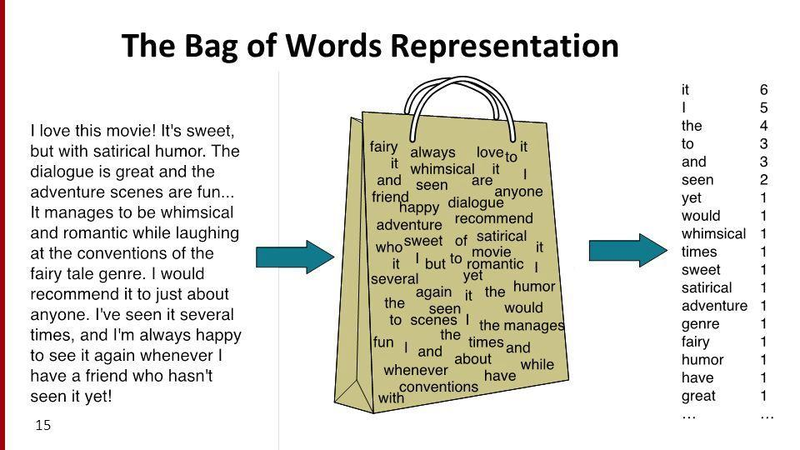

#### Keras Tokenizer

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow)
print("단어장(Vocabulary)의 크기 : ", len(tokenizer.word_counts)) # 중복을 제외한 단어의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 :  10


#### scikit-learn CountVectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [4]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


## 2. DTM과 코사인 유사도

- **DTM(Document-Term-Matrix)**: 여러 문서의 Bag of Words를 하나의 행렬로 구현한 것, 각 문서에 등장한 단어의 빈도수를 행렬로 통합시킨 형태이며, 문서를 행으로 단어를 열로 갖는다. 문헌에 따라서는 TDM(Term-Document-Matrix)라고 부르기도 합니다.

원래 문장:
- Doc 1: Intelligent applications creates intelligent business processes
- Doc 2: Bots are intelligent applications
- Doc 3: I do business intelligence

|        | and | applications | are | business | bots | creates | do | i | intelligent | intelligence | processes |
|--------|-----|--------------|-----|----------|------|---------|----|---|-------------|--------------|-----------|
| Doc 1  | 1   | 1            | 0   | 1        | 0    | 1       | 0  | 0 | 2           | 0            | 1         |
| Doc 2  | 0   | 1            | 1   | 0        | 1    | 0       | 0  | 0 | 1           | 0            | 0         |
| Doc 3  | 0   | 0            | 0   | 1        | 0    | 0       | 1  | 1 | 0           | 1            | 0         |

#### Cosine Similarity
- 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도
- 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 된다.
- DTM의 행으로 위치한 각 문서 사이의 유사도를 계산할 수 있다.

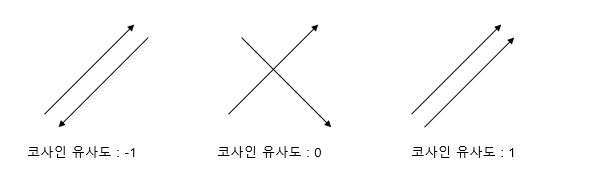

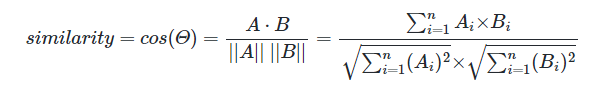

In [5]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [6]:
print('{:.2f}'.format(cos_sim(doc1, doc2))) #문서1과 문서2의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc1, doc3))) #문서1과 문서3의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc2, doc3))) #문서2과 문서3의 코사인 유사도

0.67
0.67
1.00


#### DTM

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


1. DTM에서 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다
    - 저장 공간의 낭비
    - 지나친 차원의 크기로 인한 차원의 저주
2. 단어의 빈도에만 집중하는 방법적인 한계
    - 의미없는 단어의 반복 개수가 고려됨 ( 'the'라는 단어가 많이 나온 두 문서는 유사도가 높은가? )
    - 중요한 단어와 그렇지 않은 단어의 가중치를 따로 주는 방법이 없을까 ??
    
## 3. TF-IDF (Term Frequency-Inverse Document Frequency)
- TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것입니다.
- TF와 DTM은 같은 것이기에, DTM에 IDF를 곱해주면 구할 수 있습니다.

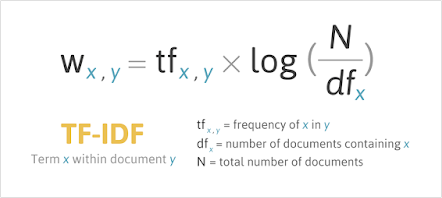

- TF는 DTM처럼 구하고, IDF는 다음과 같은 수식으로 구할 수 있습니다:
  
  IDF = log(전체 문서 수 / 해당 단어가 출현한 수)

In [9]:
from math import log
import pandas as pd

In [8]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
] # 3개의 문장

In [10]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [11]:
N = len(docs) # 총 문서의 수
N

3

In [12]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [13]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


- DTM을 구한 뒤, 각 단어의 IDF를 구해줍니다.

In [14]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [15]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


- 각 단어의 DTM에 IDF 값을 곱해서 TF-IDF를 완성합니다.

### scikit-learn TFidVectorizer활용

- log항의 분모 뿐만 아니라, 분자에도 1을 더해주고
- TF-IDF 결과에 L2 Norm을 수행한다는 점이 다르다.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


# LSA와 LDA
## 1. LSA (Latent Semantic Analysis)

- 잠재 의미 분석이라고 불리는 LSA는 전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술
- LSA를 사용하면 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수를 찾아낼 수 있다.
- 어떤 문서에서 특정 단어들의 빈도가 몇인지를 판단하는 것보다 효과적인 경우가 많다.


### 특잇값 분해 (SVD)
- LSA를 이해하기 위해서 특잇값분해를 함께 이해할 필요가 있다.

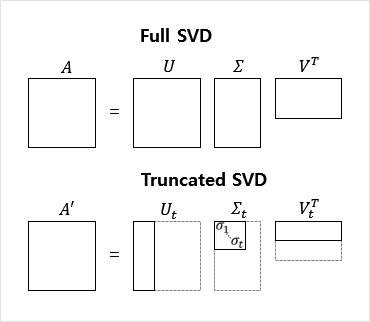

- 특잇값 분해(Singular Value Decomposition, SVD) 란 **m × n 크기의 임의의 사각 행렬 A**를 
- 위의 그림의 Full SVD와 같이 **특이 벡터(singular vector)의 행렬와 특잇값(singular value)의 대각행렬로 분해하는 것**을 말합니다.


- N×M 크기의 행렬 A를 다음과 같은 3개의 행렬의 곱으로 나타내는 것을 **특잇값 분해(singular value decomposition)**라고 합니다:

    ### A = UΣV^T


#### 특잇값 분해 조건

- 대각성분이 양수인 대각행렬이어야 합니다. 큰 수부터 작은 수 순서로 배열합니다.
  - Σ ∈ ℝ^(N×M)
  
- U는 N차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교해야 합니다.
  - U ∈ ℝ^(N×N)
  
- V는 M차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교해야 합니다.
  - V ∈ ℝ^(M×M)

위 조건을 만족하는 
- 행렬 Σ의 대각성분들을 **특잇값(singular value)**, 
- 행렬 U의 열벡터들을 **왼쪽 특이벡터(left singular vector)**, 
- 행렬 V의 행벡터들을 **오른쪽 특이벡터(right singular vector)**라고 부릅니다.

[정리] 특이분해는 모든 행렬에 대해 가능합니다. 즉 어떤 행렬이 주어지더라도 위와 같이 특이분해할 수 있습니다.


### Truncated SVD
- 특잇값 가운데 가장 큰(다시 말해, 가장 중요한) k개만 남기고 해당 특잇값에 대응되는 특이 벡터(singular vector) 들로 행렬 A를 근사(approximate) 하도록 하면, 이를 절단된 특잇값 분해(Truncated SVD)라고 합니다.
- Truncated SVD를 수행하면 행렬 Σ의 대각 원소값 중에서 상위값 t개만 남게 되며, U행렬과 V행렬의 t열까지만 남습니다. 이로 인해 세 행렬에서 값(정보)의 손실이 일어나 기존의 행렬 A를 정확히 복구할 수는 없게 됩니다.

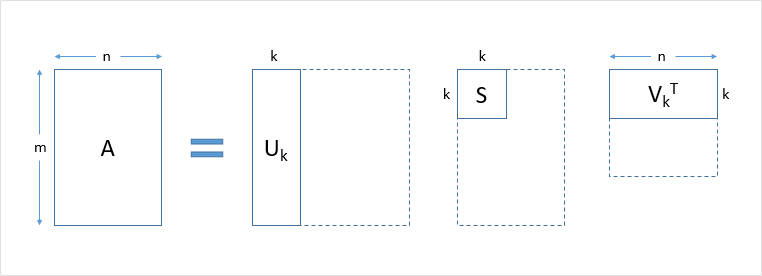

- m을 문서의 수, n을 단어의 수라고 하였을 때, Truncated SVD를 통해 얻은 행렬 U_k는 m×k의 크기를 가집니다. 문서의 수에 해당되는 m의 크기는 줄어들지 않았습니다. 이때 행렬 U_k의 각 행은 각 문서를 표현하는 문서 벡터입니다.

- 반대로 행렬 V_k^T는 k×n의 크기를 가지는 행렬이 됩니다. 이 행렬의 각 열은 각 단어를 나타내는 n 차원의 단어 벡터가 됩니다. A에서 단어 벡터의 크기는 m이었는데, V_k^T는 k의 크기를 가지게 되었으니 벡터의 차원이 저차원으로 축소된 셈입니다. 벡터의 차원을 저차원으로 축소하면서 잠재된 의미를 끌어내는 여러 가지 방법은 '워드 임베딩'을 배울 때 더 자세히 다룹니다.

### LSA 실습

In [24]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
# nltk의 데이터셋 다운로드
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import os

csv_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('/aiffel/aiffel/topic_modelling/data/abcnews-date-text.csv',
 <http.client.HTTPMessage at 0x7f1472455400>)

In [27]:
data = pd.read_csv(csv_filename, on_bad_lines='skip')
data.shape

(1082168, 2)

In [28]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [29]:
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [31]:
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

In [30]:
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True)
text.shape

(1054983, 1)

#### 데이터 정제 및 정규화

In [32]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [33]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


#### 역토큰화 및 DTM 생성

- DTM을 생성하는 CountVectorizer 
- 또는 TF-IDF 행렬을 생성하는 TfidfVectorizer의 입력으로 사용하기 위해서 
- 토큰화 과정을 역으로 되돌리는 역토큰화(detokenization) 를 수행합니다.

In [34]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('=3')

=3


In [35]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [36]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('=3')

=3


In [37]:
print('행렬의 크기 :',document_term_matrix.shape)

행렬의 크기 : (1054983, 5000)


#### scikit-learn TruncatedSVD 활용

In [38]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20407624e-02, -3.71056936e-03,  1.82536051e-02, ...,
         3.83750647e-03,  1.25426158e-04,  1.35795963e-02],
       [ 2.90496994e-02, -1.09669016e-02,  1.82490265e-02, ...,
        -2.02791896e-03, -1.03787721e-02, -5.48526763e-03],
       [ 5.03578991e-03, -2.03172791e-03,  9.74482164e-03, ...,
        -2.74303244e-03,  9.35785679e-04,  2.49975934e-03],
       ...,
       [ 2.97081748e-02,  4.00760301e-03,  2.51083940e-02, ...,
         3.76948848e-02,  1.17005811e-02,  1.68112741e-02],
       [ 6.17406554e-02, -6.97483572e-03,  1.37826349e-01, ...,
         8.40224323e-01,  9.14122028e-01, -3.50078708e-01],
       [ 7.13761556e-02,  3.00099030e-02, -3.00454413e-04, ...,
         3.08471213e-02,  3.27607076e-02,  3.03788095e-02]])

TruncatedSVD를 통해 얻은 행렬 V_k^t의 크기를 확인

In [39]:
print(lsa_model.components_.shape)

(10, 5000)


In [40]:
terms = c_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

Topic 1: [('police', 0.74635), ('man', 0.45355), ('charge', 0.21086), ('new', 0.14089), ('court', 0.11152)]
Topic 2: [('man', 0.69423), ('charge', 0.30011), ('court', 0.16711), ('face', 0.11633), ('murder', 0.10636)]
Topic 3: [('new', 0.83662), ('plan', 0.23655), ('say', 0.18238), ('govt', 0.11096), ('council', 0.10998)]
Topic 4: [('say', 0.73853), ('plan', 0.35661), ('govt', 0.16821), ('council', 0.13234), ('urge', 0.07298)]
Topic 5: [('plan', 0.73172), ('council', 0.17726), ('govt', 0.13488), ('urge', 0.08404), ('water', 0.07533)]
Topic 6: [('govt', 0.54354), ('court', 0.24732), ('urge', 0.23509), ('fund', 0.23437), ('face', 0.1992)]
Topic 7: [('charge', 0.50757), ('court', 0.47997), ('face', 0.30629), ('murder', 0.13054), ('plan', 0.1234)]
Topic 8: [('win', 0.54116), ('court', 0.35263), ('crash', 0.19788), ('kill', 0.1912), ('face', 0.10886)]
Topic 9: [('win', 0.65113), ('charge', 0.44749), ('cup', 0.08504), ('world', 0.07675), ('australia', 0.07147)]
Topic 10: [('council', 0.72029)

## 2. LDA
- **토픽 모델링(Topic Modelling)** : 문서의 집합에서 토픽을 찾아내는 프로세스
- 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA) 은 토픽 모델링의 또 다른 대표적인 알고리즘


- LDA는 문서들이 토픽들의 혼합으로 구성되어 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정한다.
- 데이터가 주어지면, LDA는 위의 가정에 따라 단어들의 분포로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아낸다.

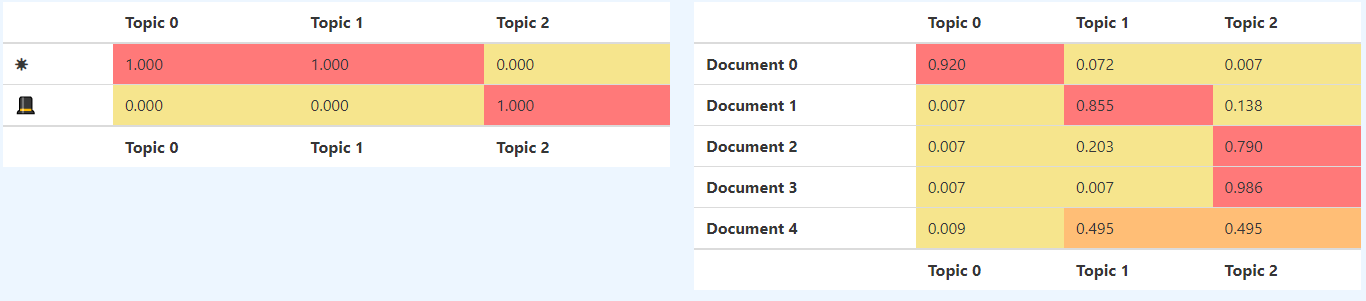

- 첫 번째 행렬 : 첫 번째 행렬의 행은 단어 집합의 단어들이고, 열은 Topic입니다.
- 두 번째 행렬 : 두 번째 행렬의 행은 문서이고, 열은 Topic입니다.
- **LDA는 각 토픽의 단어 분포와 각 문서의 토픽 분포를 추정해냅니다.**


**LDA는 각 문서의 토픽 분포와 각 토픽 내의 단어 분포를 추정합니다.**

<각 문서의 토픽 분포>
- **문서1** : 토픽 A **100%**
- **문서2** : 토픽 B **100%**
- **문서3** : 토픽 B **60%**, 토픽 A **40%**

<각 토픽의 단어 분포>
- **토픽A** : 사과 **20%**, 바나나 **40%**, 먹어요 **40%**, 귀여운 **0%**, 강아지 **0%**, 깜찍하고 **0%**, 좋아요 **0%**
- **토픽B** : 사과 **0%**, 바나나 **0%**, 먹어요 **0%**, 귀여운 **33%**, 강아지 **33%**, 깜찍하고 **16%**, 좋아요 **16%**

**LDA는 토픽의 제목을 정해주지 않지만, 이 시점에서 알고리즘의 사용자는 위 결과로부터 두 토픽이 각각 과일에 대한 토픽과 강아지에 대한 토픽이라고 판단해볼 수 있습니다.**

### 정리

- LSA는 DTM을 차원 축소하여 축소 차원에서 근접 단어들을 토픽으로 묶는 반면에, 
- LDA는 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합 확률로 추정하여 토픽을 추출합니다.


### LDA 실습

1. TF-IDF 생성
2. scikit-learn LDA 모델 활용

In [41]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


In [42]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [43]:
print(lda_model.components_.shape)

(10, 5000)


In [44]:
terms = tfidf_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_, terms)

Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

# 텍스트 분포를 이용한 비지도 학습 토크나이저
## 1. 형태소 분석기와 단어 미등록 문제

### 형태소 분석기


- 한국어는 교착어의 특성을 갖는다. **(하나의 어절이 하나의 어근과 각각 단일한 기능을 가지는 하나 이상의 접사의 결합으로 이루어져 있는 언어)**
- 이런 특성으로 영어와 달리 조사나 접사가 존재하고, 영어처럼 띄어쓰기 단위 토큰화가 제대로 동작하지 않는다.

In [45]:
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


In [47]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


- 위와 같이 **사과의, 사과를, 사과가, 사과랑**을 모두 다른 언어로 인식하게 된다.
- 이를 해결하기 위해서 형태소 분석기를 사용한다.

In [48]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


### 단어 미등록 문제
- 하지만 기존의 형태소 분석기는 **등록된 단어를 기준으로 형태소를 분류해서 새롭게 만들어진 단어를 인식하기 어렵다.**

**사용자 사전 등록:** 사용자가 직접 미등록 단어를 사전에 등록해 주는 방법입니다. 이를 통해 미등록 단어에 대한 분석 정확도를 높일 수 있습니다.

**자동사전 생성:** 미등록 단어를 자동으로 추출하여 사전에 등록하는 방법입니다. 이를 위해서는 대용량의 텍스트 데이터를 활용하여 빈도 수 등을 기반으로 자동으로 사전을 생성합니다.

**기존 단어 활용:** 형태소 분석기는 단어의 어간 등을 추출하는 방식으로 동작합니다. 이때, 미등록 단어라도 기존 단어의 어간과 유사한 부분이 있다면, 해당 부분을 활용하여 분석을 수행할 수 있습니다.

**문맥 분석:** 미등록 단어의 문맥을 분석하여, 해당 단어가 명사, 동사 등의 품사 중 어떤 것에 가까운지를 예측하여 분석을 수행할 수 있습니다. 이를 위해서는 머신 러닝 기반의 분류 모델을 이용하여 분석을 수행합니다.

In [50]:
print(tokenizer.morphs('대호의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['대', '호의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


- 하나의 단어인 대호의연구소가 모두 분리된 결과를 보여준다.
- 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 방식을 사용한다.
- 이러한 형태소 분석기를 **soynlp**라고 한다.

## 2. soynlp

- soynlp는 **품사 태깅, 형태소 분석 등**을 지원하는 한국어 형태소 분석기입니다.
- **비지도 학습으로 형태소 분석을 한다**는 특징을 갖고 있으며, **데이터에 자주 등장하는 단어들을 형태소로 분석**합니다.
- soynlp 형태소 분석기는 **내부적으로 단어 점수표로 동작**합니다. 
- 이 점수는 **응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용**합니다.

In [52]:
import urllib.request

txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('/aiffel/aiffel/topic_modelling/data/2016-10-20.txt',
 <http.client.HTTPMessage at 0x7f1432c631c0>)

In [53]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

In [54]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [55]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 2.461 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### soynlp의 응집확률

- **응집확률** : 내부 문자열이 얼마나 응집하여 자주 등장하는지를 판단하는 척도
- 문자열을 문자단위로 분리하여 내부 문자열을 만드는 과정에서, 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적 곱을 한 값이다.
- 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다.

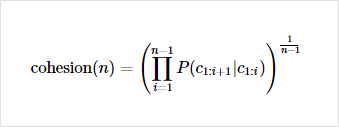

예를 들어서 '반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해 각 내부 문자열의 스코어는 아래와 같이 구해집니다.
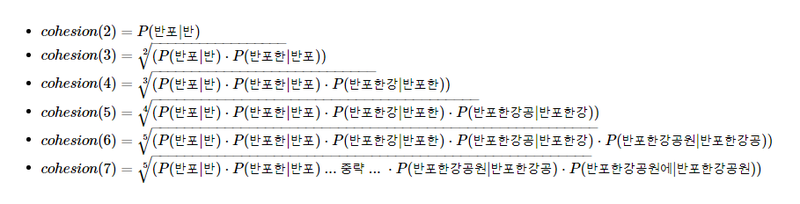

In [56]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [57]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [58]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [59]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [60]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

### soynlp의 Branching Entropy

- **브랜칭 엔트로피(Branching Entropy)**: 확률 분포의 엔트로피값을 사용한다.
- 이는 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도가 된다.

In [61]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [62]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [63]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [64]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

- 디스플까지 나오면 다음 단어는 레가 나오는 것이 명확해지기 때문에 엔트로피가 0이 된다.
- 하나의 단어가 끝나면 해당 문자 시퀀스 다음에는 조사나 다른 언어가 나올 수 있는 경우가 많기에 **단어 경계 부분에서는 브랜칭 엔트로피가 증가**

#### soynlp - LTokenizer

- 한국어는 띄어쓰기 단위로 나눈 어절 토큰이 주로 L 토큰 + R 토큰의 형식을 가질 때가 많다.
- '공원에'는 '공원' + '에'로 바꿀 수 있다.
- LTokenizer는 띄어쓰기 단위로 나눠진 어절 토큰을 **L 토큰 + R 토큰으로 나누되, 점수가 가장 높은 L 토큰을 찾아내는 분리기준을 갖고 있다.**

In [65]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

#### 최대 점수 토크나이저
- 최대 점수 토크나이저(MaxScoreTokenizer) : 띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [66]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

**DTM (Document-Term Matrix)**은 문서-단어 행렬을 의미합니다. 각 문서에서 사용된 단어의 빈도를 표시하며, 행은 문서를 나타내고 열은 단어를 나타냅니다. 텍스트 데이터의 각 문서를 벡터로 표현할 수 있으며, 이를 활용해 문서 간 유사도를 계산하거나 토픽 모델링 등의 분석을 수행할 수 있습니다.

**TF-IDF (Term Frequency-Inverse Document Frequency)**는 DTM에서 특정 단어가 얼마나 중요한지를 나타내는 지표입니다. 많이 나오는 일반적인 단어들은 중요하지 않은 단어로 간주되고, 문서를 잘 나타내는 중요한 단어들이 높은 점수를 받게 됩니다.

**LSA (Latent Semantic Analysis)**는 DTM을 활용해 문서 간 유사도를 계산하는 방법 중 하나입니다. 단어-문서 행렬에서 잠재적인 의미를 추출하여 문서를 벡터 공간 상에 표현합니다. 이를 통해 문서 간 유사도를 계산할 수 있습니다.

**LDA (Latent Dirichlet Allocation)**는 문서 내의 토픽 분포와 토픽 내 단어 분포를 추정하여 토픽 모델링을 수행하는 방법입니다. 각 문서는 여러 개의 토픽으로 구성되어 있으며, 각 토픽은 단어들의 확률 분포로 나타내어집니다. 이를 통해 각 문서가 어떤 주제를 다루는지를 파악할 수 있습니다.

**soynlp**는 한국어 자연어 처리를 위한 파이썬 라이브러리입니다. 특히, 자주 등장하는 신조어나 오탈자, 그리고 형태소 분석에서 발생하는 OOV(Out-of-Vocabulary) 문제를 처리하는 데 강점을 가지고 있습니다. 데이터에서 단어 빈도수를 기반으로 단어들을 자동으로 추출하며, 이를 활용해 형태소 분석을 수행합니다.
